In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

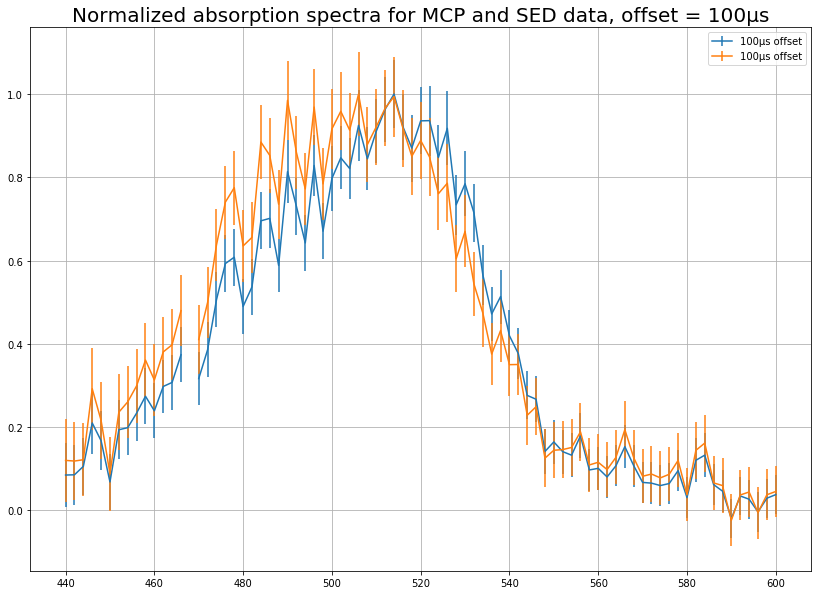

In [83]:
# CROSS SECTION
from spectrum_analysis_function import spectrum_analysis

# Loading data
offset = 100
lambdas_no_offset, css_no_offset, uncs_no_offset, fig_no_offset = spectrum_analysis("C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_Laser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_NoLaser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/energy_data.txt", False, 0)
lambdas_100µs_offset, css_100µs_offset, uncs_100µs_offset, fig_100µs_offset = spectrum_analysis("C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_Laser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/MCP_NoLaser_440_600_run012_15-02-22.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Spectrum data - 15.2/energy_data.txt", False, offset)

# Plotting normalized spectra
fig = plt.figure(figsize=(14,10))
plt.errorbar(lambdas_no_offset, css_no_offset/max(css_no_offset), uncs_no_offset/max(css_no_offset),label= str(offset) + 'µs offset')
plt.errorbar(lambdas_100µs_offset, css_100µs_offset/max(css_100µs_offset), uncs_100µs_offset/max(css_100µs_offset),label= str(offset) + 'µs offset')
plt.title('Normalized absorption spectra for MCP and SED data, offset = ' + str(offset) + 'µs', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [312]:
# POWER CALIBRATION
def load_pc_data(data_0_40, data_40_100):
    d0_40 = pd.read_csv(data_0_40, delimiter="\t")
    d40_100 = pd.read_csv(data_40_100, delimiter="\t")
    
    data0_40 = pd.DataFrame(d0_40)
    data0_40 = data0_40.drop(data0_40.columns[0], axis=1)
    data0_40 = data0_40.drop(data0_40.columns[4:8], axis=1)
    data0_40 = data0_40.drop(data0_40.columns[6:], axis=1)
    data0_40.columns = ["MCP", "MCP_unc", "SED", "SED_unc", "power", "pow_unc"]
    
    data40_100 = pd.DataFrame(d40_100)
    data40_100 = data40_100.drop(data40_100.columns[0], axis=1)
    data40_100 = data40_100.drop(data40_100.columns[4:8], axis=1)
    data40_100 = data40_100.drop(data40_100.columns[6:], axis=1)
    data40_100.columns = ["MCP", "MCP_unc", "SED", "SED_unc", "power", "pow_unc"]
    
    data = pd.concat([data0_40, data40_100], axis=0)
    indices = np.array(range(len(data)))
    data.set_index((indices), inplace=True)
    return data 

pc_data = load_pc_data("C:/Users/Asger/SE-_22/Øvelse 1/Power calibration - 15.2/2-40_pc_clean.txt", "C:/Users/Asger/SE-_22/Øvelse 1/Power calibration - 15.2/40-100_pc_clean.txt")
transmission_coefficients = np.array([0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.97])

# fit functions
def fitfunc(x, a, b, c):
    return b*x**a

def linfit(x, a, b):
    return a*x + b

# plotting power-transmission fit (wrong)
def plot_pow_trans():
    popt_nlin_pow, cov_nlin_pow = curve_fit(fitfunc, transmission_coefficients, pc_data["power"], sigma=pc_data["unc"], absolute_sigma=True)
    popt_lin_pow, cov_lin_pow = curve_fit(linfit, transmission_coefficients, pc_data["power"], sigma=pc_data["unc"], absolute_sigma=True)

    plt.figure(figsize=(12,9))
    plt.errorbar(transmission_coefficients, np.array(pc_data["power"]), yerr=np.array(pc_data["unc"]), linestyle="", marker=".", markersize=15, capsize=3, label="Data")
    plt.plot(transmission_coefficients, fitfunc(transmission_coefficients, popt_nlin_pow[0], popt_nlin_pow[1], popt_nlin_pow[2]), label="Power law fit, n=" + str(round(popt_nlin_pow[0], 2)))
    plt.plot(transmission_coefficients, linfit(transmission_coefficients, popt_lin_pow[0], popt_lin_pow[1]), linewidth = 3, label="Linear fit, m=" + str(round(popt_lin_pow[0], 2)))

    plt.grid()
    plt.ylabel("Laser pulse energy [mJ]", fontsize=14), plt.xlabel("Transmission", fontsize=14)
    plt.yticks(fontsize=14), plt.xticks(fontsize=14)
    plt.title("Laser power vs transmission", fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

#plot_pow_trans()
print(pc_data)

        MCP   MCP_unc       SED   SED_unc    power   pow_unc
0   0.16058  0.063153  0.031534  0.005777  0.11248  0.004533
1   0.16170  0.062929  0.050505  0.006555  0.13465  0.005124
2   0.27219  0.063231  0.065114  0.006855  0.16200  0.006323
3   0.40602  0.065161  0.108490  0.008483  0.18396  0.007358
4   0.50251  0.065641  0.174580  0.010542  0.22717  0.009426
5   0.70724  0.066970  0.256650  0.012492  0.27813  0.011370
6   1.15370  0.070051  0.600140  0.020801  0.40078  0.017357
7   1.67190  0.076930  0.967310  0.030342  0.49252  0.020730
8   2.20800  0.083383  1.401000  0.040694  0.60622  0.024074
9   2.53900  0.083139  1.663500  0.044838  0.70225  0.027988
10  2.92860  0.085613  1.964000  0.050017  0.80069  0.031359
11  3.27070  0.089448  2.343300  0.060027  0.90741  0.036541
12  3.19170  0.087935  2.076200  0.053192  0.94630  0.039216
13  3.72640  0.093431  2.304200  0.055889  1.09970  0.044532
14  3.87750  0.092801  2.418300  0.057336  1.21830  0.049245
15  4.43650  0.098842  2

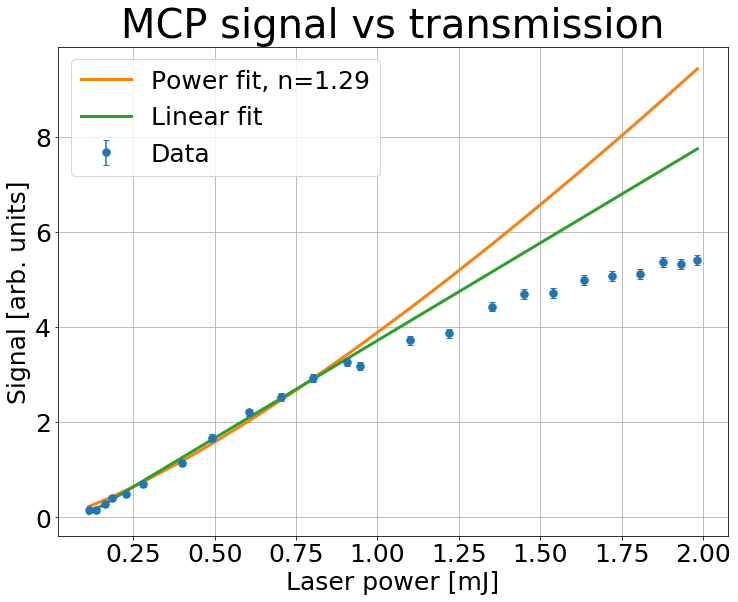

In [320]:
# PLOTTING POWER CALIBRATION

lin_fit_window = [0,12]
popt_nlin, cov_nlin = curve_fit(fitfunc, pc_data["power"][lin_fit_window[0]:lin_fit_window[1]], pc_data["MCP"][lin_fit_window[0]:lin_fit_window[1]])#, sigma=np.array(pc_data["MCP_unc"]), absolute_sigma=True)
popt_lin, cov_lin = curve_fit(linfit, pc_data["power"][lin_fit_window[0]:lin_fit_window[1]], pc_data["MCP"][lin_fit_window[0]:lin_fit_window[1]])#, sigma=np.array(pc_data["MCP_unc"]), absolute_sigma=True)

plt.figure(figsize=(12,9))
plt.errorbar(np.array(pc_data["power"]), pc_data["MCP"], yerr=pc_data["MCP_unc"], linestyle="", marker=".", markersize=15, capsize=3, label="Data")
plt.plot(np.array(pc_data["power"]), fitfunc(pc_data["power"], popt_nlin[0], popt_nlin[1], popt_nlin[2]), linewidth=3, label="Power fit, n=" + str(round(popt_nlin[0], 2)))
plt.plot(np.array(pc_data["power"]), linfit(pc_data["power"], popt_lin[0], popt_lin[1]), linewidth = 3, label="Linear fit")

plt.grid()
plt.ylabel("Signal [arb. units]", fontsize=25), plt.xlabel("Laser power [mJ]", fontsize=25)
plt.yticks(fontsize=25), plt.xticks(fontsize=25)
plt.title("MCP signal vs transmission", fontsize=40)
plt.legend(fontsize=25)
plt.savefig("power_calibration.jpg")